# TRANSCRIPTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import deque
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

import cv2

import os
import pickle
from os.path import join, exists
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import numpy as np
from datetime import timedelta
import numpy as np
import tensorflow as tf
import time

In [ ]:
%%capture

#!pip install git+https://github.com/openai/whisper.git
!pip install --upgrade git+https://github.com/openai/whisper.git
!pip install jiwer
!pip install sentencepiece

import whisper
import os
from typing import Iterator, TextIO
from datetime import datetime

In [ ]:
model = whisper.load_model("base.en")
def transcribe_me(_video, _translate=False):
  if _translate:
    _options = dict(task="translate", beam_size=5, best_of=5)
  else:
    _options = dict(task="transcribe", beam_size=5, best_of=5)
  result = model.transcribe(_video, **_options)

  return result, result["text"], result["segments"]

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 54.0MiB/s]


In [ ]:
file_path = '/content/drive/MyDrive/DATASET/CS/solar system.mp4'
output, extracted_text, res  = transcribe_me(file_path)
extracted_text

In [ ]:
file_path = '/content/drive/MyDrive/DATASET/CS/solar system.mp4'
output, extracted_text, res  = transcribe_me(file_path)
extracted_text

" Our solar system is one of over 500 known solar systems in the entire Milky Way galaxy. The solar system came into being about 4.5 billion years ago when a cloud of interstellar gas and dust collapsed, resulting in a solar nebula, a swirling disk of material that collided to form the solar system. The solar system is located in the Milky Way's Orion Star Cluster. Only 15% of stars in the galaxy host planetary systems, and one of those stars is our own sun. Revolving around the sun are eight planets. The planets are divided into two categories based on their composition, terrestrial and jovian. Real planets, including Mercury, Venus, Earth and Mars, are primarily made of rocky material. Their surfaces are solid, they don't have ring systems, they have very few or no moons, and they are relatively small. The smallest and closest to the sun is Mercury, which has the shortest orbit in the solar system at about three Earth months. Venus is the hottest planet, with temperatures of up to 86

In [ ]:
model.device

device(type='cuda', index=0)

In [ ]:
file_path = '/content/drive/MyDrive/DATASET/EVS/1676963736(1).mp4'
output, extracted_text, res  = transcribe_me(file_path)
extracted_text

/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


" Hi, it's Mr. Andersen and this is environmental science video three, it's on geology, which is the study of rocks and how they change over time, and in this class more appropriately how that affects human society. Now the problem with rocks is that they change slowly, they change over geologic time, and we simply don't live long enough to see all these changes occur. You could imagine how this sandstone is being shaped by the wind, but you can't see it. And it's not until we see lava that we really start to understand the dynamic earth, and to understand these systems on the earth we should really understand how the earth is put together. And so if we look at the layers on the inside we have the inner and outer core, we then have the mantle, and finally we have the crust. Now we live on the crust, and we've only been able to dig just a little bit into the crust. And so we've been able to figure out everything else by looking at how earthquake waves move through the earth. And we know

In [ ]:
test_videos_loc = "/content/drive/MyDrive/DATASET/test"
test_videos = os.listdir(test_videos_loc)

In [ ]:
for i, val in enumerate(test_videos):
  temp1 = val.split(".")
  print(temp1)

['test1', 'mp4']
['test2', 'mp4']
['test3', 'mp4']
['test4', 'mp4']
['test5', 'mp4']
['coref_resolved_text', 'txt']
['test6', 'mp4']


In [ ]:
print("Number of Testing Videos: ", len(test_videos))

Number of Testing Videos:  7


In [ ]:
extracted_transcripts = []
for i, val in enumerate(test_videos):
  temp1 = val;
  print(i)
  print(temp1)
  file_path = '/content/drive/MyDrive/DATASET/test/'+temp1;
  output, extracted_text, res  = transcribe_me(file_path)
  extracted_transcripts.append(extracted_text)

0
test4.mp4


/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


1
test3.mp4


/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


2
test2.mp4


/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


3
test1.mp4


/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [ ]:
for extracted_transcript in extracted_transcripts:
  print(extracted_transcript)

 Hello, kids. Do you know how plants make their own food? No? Well, this video elaborates the process of photosynthesis by which plants make their own food. Photosynthesis is the process used by plants to make their own food or in more complex terms. It is the conversion of light energy into chemical energy by plants. This chemical energy is used by the plants for growth and nourishment. Photo means light and synthesis means putting together in Greek. When humans cook food, some essential things are required, including fire, water, vegetables, etc. Similarly, to make their food, plants also need some essential factors, including light, water, nutrients, soil, etc. Plants get light from the sun, water from the ground, and carbon dioxide from the air. All of these factors, including air, water, carbon dioxide, and sunlight, together help plants churn out their own food. Plants have tubes called xylum, located in the stems through which the water from the ground is sucked into the leaves.

In [ ]:
extracted_transcripts[0]

" Hello, kids. Do you know how plants make their own food? No? Well, this video elaborates the process of photosynthesis by which plants make their own food. Photosynthesis is the process used by plants to make their own food or in more complex terms. It is the conversion of light energy into chemical energy by plants. This chemical energy is used by the plants for growth and nourishment. Photo means light and synthesis means putting together in Greek. When humans cook food, some essential things are required, including fire, water, vegetables, etc. Similarly, to make their food, plants also need some essential factors, including light, water, nutrients, soil, etc. Plants get light from the sun, water from the ground, and carbon dioxide from the air. All of these factors, including air, water, carbon dioxide, and sunlight, together help plants churn out their own food. Plants have tubes called xylum, located in the stems through which the water from the ground is sucked into the leaves

In [ ]:
extracted_transcripts[1]

" A, C, E, D, B, K. No, this isn't some random out-of-order alphabet. These are vitamins. And just like letters build words, they're the building blocks that keep the body running. Vitamins are organic compounds we need to ingest in small amounts to keep functioning. They're the body's builders, defenders, and maintenance workers, helping it to build muscle and bone, make use of nutrients, capture and use energy, and heal wounds. If you need convincing about vitamin value, just consider the plight of olden-day sailors who had no access to vitamin-rich fresh produce. They got scurvy, but vitamin C, abundant in fruits and vegetables, was the simple antidote to this disease. While bacteria, fungi, and plants produce their own vitamins, our bodies can't, so we have to get them from other sources. So how does the body get vitamins from out there into here? That's dependent on the form these compounds take. Vitamins come in two types, lipid-soluble and water-soluble, and the difference betwe

In [ ]:
extracted_transcripts[2]

" In today's video, we're going to look at the basics of waves, including how to label the different parts, how to calculate the wave speed, and the differences between transverse and longitudinal waves. The first thing to understand about waves is that they transfer energy from one place to another, but they don't transfer any matter. So when light waves pass from a phone screen to your eye, or sound waves pass from the speakers to your ear, only energy is being transferred. Sometimes though we can interpret that energy as meaningful information, which is why our brain is able to build up images and tunes from the light and sound that it receives. To travel from one place to another, the waves vibrate or oscillate, as we can see in this displacement distance graph. The distance is how far the wave has travelled from the starting point. While the displacement is how far from the equilibrium point, the wave has oscillated. So how far it's gone up or down. The maximum displacement is kno

In [ ]:
len(extracted_transcripts)

4

In [ ]:
file_path = '/content/drive/MyDrive/DATASET/test/test6.mp4'
output, extracted_text, res  = transcribe_me(file_path)
extracted_text

100%|███████████████████████████████████████| 139M/139M [00:03<00:00, 36.4MiB/s]
/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


" Rutherford's atomic model was quite commendable when it came to explaining the structure of atoms. However, it was not very appropriate theoretically. And why are we saying so? We know that any charged object which revolves in a circular motion gains acceleration gradually. Similarly, if the electron is moving fast in a circular path, then it will also gain acceleration. And on gaining acceleration, it's bound to liberate energy in some form. Now if it continuously keeps radiating energy, then ultimately all the energy of the electron will get over and it will fall into the nucleus. This would result in high instability of the atom. But wait a second, all these things do not happen in an atom. And how do we know this? Because in nature, all the atoms are stable. That means the hypothesis put forth by Rutherford was also incorrect. Not really, the hypothesis just needed slight modifications. These were made by the next legendary scientist in our list called Niels Bohr. He made a few a

# PREPROCESSING

## COREFERENCE RESOLUTION

In [ ]:
!git clone https://github.com/huggingface/neuralcoref.git
%cd neuralcoref/
!pip install -r requirements.txt
!pip install -e .
!python -m spacy download en_core_web_sm
!pip install neuralcoref --no-binary neuralcoref

Cloning into 'neuralcoref'...
remote: Enumerating objects: 772, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 772 (delta 10), reused 16 (delta 7), pack-reused 748
Receiving objects: 100% (772/772), 67.85 MiB | 12.73 MiB/s, done.
Resolving deltas: 100% (407/407), done.
Updating files: 100% (151/151), done.
/content/neuralcoref
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.6
    Uninstalling srsly-2.4.6:
      Suc

In [ ]:
import spacy
import neuralcoref
nlp = spacy.load('en_core_web_sm')
neuralcoref.add_to_pipe(nlp)

100%|██████████| 40155833/40155833 [00:00<00:00, 53396862.17B/s]


In [ ]:
nlp = spacy.load('en_core_web_sm')
neuralcoref.add_to_pipe(nlp)

In [ ]:
text = "Eva and Martha didn't want their friend Jenny to feel lonely so they invited her to the party in Las Vegas."
doc = nlp(text)

In [ ]:
doc

Eva and Martha didn't want their friend Jenny to feel lonely so they invited her to the party in Las Vegas.

In [ ]:
clusters = doc._.coref_clusters
clusters

[Eva and Martha: [Eva and Martha, their, they], Jenny: [Jenny, her]]

In [ ]:
doc._.coref_resolved

"Eva and Martha didn't want Eva and Martha friend Jenny to feel lonely so Eva and Martha invited Jenny to the party in Las Vegas."

In [ ]:
!pip install allennlp
!pip install --pre allennlp-models
from allennlp.predictors.predictor import Predictor

model_url = 'https://storage.googleapis.com/allennlp-public-models/coref-spanbert-large-2020.02.27.tar.gz'
predictor = Predictor.from_path(model_url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 21.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Output()

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/634M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at SpanBERT/spanbert-large-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
text1 = "Let's dig into our discoveries. We'll look at the redundant cluster finding problem"
prediction = predictor.predict(document=text1)
prediction

{'top_spans': [[1, 1], [4, 4], [4, 5], [7, 7], [9, 9], [11, 15]],
 'antecedent_indices': [[0, 1, 2, 3, 4, 5],
  [0, 1, 2, 3, 4, 5],
  [0, 1, 2, 3, 4, 5],
  [0, 1, 2, 3, 4, 5],
  [0, 1, 2, 3, 4, 5],
  [0, 1, 2, 3, 4, 5]],
 'predicted_antecedents': [-1, 0, -1, 1, -1, -1],
 'document': ['Let',
  "'s",
  'dig',
  'into',
  'our',
  'discoveries',
  '.',
  'We',
  "'ll",
  'look',
  'at',
  'the',
  'redundant',
  'cluster',
  'finding',
  'problem'],
 'clusters': [[[1, 1], [4, 4], [7, 7]]]}

In [ ]:
predictor.coref_resolved(text1)

"Let's dig into 's's discoveries. 's'll look at the redundant cluster finding problem"

In [ ]:
def get_span_words(span, document):
    return ' '.join(document[span[0]:span[1]+1])

def print_clusters(prediction):
    document, clusters = prediction['document'], prediction['clusters']
    for cluster in clusters:
        print(get_span_words(cluster[0], document) + ': ', end='')
        print(f"[{'; '.join([get_span_words(span, document) for span in cluster])}]")

In [ ]:
print_clusters(prediction)

's: ['s; our; We]


### Redundant clusters - lack of a meaningfull mention that could become the head

In [ ]:
def core_logic_part(document: doc, coref: list[int], resolved: list[str], mention_span: spacy.tokens.span.Span):
    final_token = document[coref[1]]
    if final_token.tag_ in ["PRP$", "POS"]:
        resolved[coref[0]] = mention_span.text + "'s" + final_token.whitespace_
    else:
        resolved[coref[0]] = mention_span.text + final_token.whitespace_
    for i in range(coref[0] + 1, coref[1] + 1):
        resolved[i] = ""
    return resolved


def original_replace_corefs(document: doc, clusters: list[list[list[int]]]) -> str:
    resolved = list(tok.text_with_ws for tok in document)

    for cluster in clusters:
        mention_start, mention_end = cluster[0][0], cluster[0][1] + 1
        mention_span = document[mention_start:mention_end]

        for coref in cluster[1:]:
            core_logic_part(document, coref, resolved, mention_span)

    return "".join(resolved)

In [ ]:
# our contribution
def get_span_noun_indices(doc: doc, cluster: list[list[int]]) -> list[int]:
    spans = [doc[span[0]:span[1]+1] for span in cluster]
    spans_pos = [[token.pos_ for token in span] for span in spans]
    span_noun_indices = [i for i, span_pos in enumerate(spans_pos)
        if any(pos in span_pos for pos in ['NOUN', 'PROPN'])]
    return span_noun_indices

def improved_replace_corefs(document, clusters):
    resolved = list(tok.text_with_ws for tok in document)

    for cluster in clusters:
        noun_indices = get_span_noun_indices(document, cluster)

        if noun_indices:
            mention_start, mention_end = cluster[0][0], cluster[0][1] + 1
            mention_span = document[mention_start:mention_end]

            for coref in cluster[1:]:
                core_logic_part(document, coref, resolved, mention_span)

    return "".join(resolved)

In [ ]:
text = "We want to take our code and create a game. Let's remind ourselves how to do that."
prediction = predictor.predict(document=text)
clusters = predictor.predict(text)['clusters']
doc = nlp(text)

In [ ]:
prediction

{'top_spans': [[0, 0],
  [1, 1],
  [4, 4],
  [4, 5],
  [7, 7],
  [12, 12],
  [14, 14],
  [18, 18]],
 'antecedent_indices': [[0, 1, 2, 3, 4, 5, 6, 7],
  [0, 1, 2, 3, 4, 5, 6, 7],
  [0, 1, 2, 3, 4, 5, 6, 7],
  [0, 1, 2, 3, 4, 5, 6, 7],
  [0, 1, 2, 3, 4, 5, 6, 7],
  [0, 1, 2, 3, 4, 5, 6, 7],
  [0, 1, 2, 3, 4, 5, 6, 7],
  [0, 1, 2, 3, 4, 5, 6, 7]],
 'predicted_antecedents': [-1, -1, 0, -1, -1, 0, 0, 4],
 'document': ['We',
  'want',
  'to',
  'take',
  'our',
  'code',
  'and',
  'create',
  'a',
  'game',
  '.',
  'Let',
  "'s",
  'remind',
  'ourselves',
  'how',
  'to',
  'do',
  'that',
  '.'],
 'clusters': [[[0, 0], [4, 4], [12, 12], [14, 14]], [[7, 7], [18, 18]]]}

In [ ]:
doc

We want to take our code and create a game. Let's remind ourselves how to do that.

In [ ]:
print_clusters(prediction)

We: [We; our; 's; ourselves]
create: [create; that]


In [ ]:
original_replace_corefs(doc, clusters)

"We want to take We's code and create a game. LetWe remind We how to do create."

In [ ]:
improved_replace_corefs(doc, clusters)

"We want to take our code and create a game. Let's remind ourselves how to do that."

### Cataphora problem - choosing the wrong cluster head

In [ ]:
# our contribution
def get_cluster_head(doc: doc, cluster: list[list[int]], noun_indices: list[int]):
    head_idx = noun_indices[0]
    head_start, head_end = cluster[head_idx]
    head_span = doc[head_start:head_end+1]
    return head_span, [head_start, head_end]


def improved_replace_corefs(document, clusters):
    resolved = list(tok.text_with_ws for tok in document)

    for cluster in clusters:
        noun_indices = get_span_noun_indices(document, cluster)

        if noun_indices:
            mention_span, mention = get_cluster_head(document, cluster, noun_indices)

            for coref in cluster:
                if coref != mention:  # we don't replace the head itself
                    core_logic_part(document, coref, resolved, mention_span)

    return "".join(resolved)

In [ ]:
text = '"He is a great actor!", he said about John Travolta.'
prediction = predictor.predict(document=text)
clusters = predictor.predict(text)['clusters']
doc = nlp(text)

In [ ]:
print_clusters(prediction)

He: [He; John Travolta]


In [ ]:
original_replace_corefs(doc, clusters)

'"He is a great actor!", he said about He.'

In [ ]:
improved_replace_corefs(doc, clusters)

'"John Travolta is a great actor!", he said about John Travolta.'

### Nested coreferent mentions

In [ ]:
# our contribution
def is_containing_other_spans(span: list[int], all_spans: list[list[int]]):
    return any([s[0] >= span[0] and s[1] <= span[1] and s != span for s in all_spans])


def improved_replace_corefs(document, clusters):
    resolved = list(tok.text_with_ws for tok in document)
    all_spans = [span for cluster in clusters for span in cluster]  # flattened list of all spans

    for cluster in clusters:
        noun_indices = get_span_noun_indices(document, cluster)

        if noun_indices:
            mention_span, mention = get_cluster_head(document, cluster, noun_indices)

            for coref in cluster:
                if coref != mention and not is_containing_other_spans(coref, all_spans):
                    core_logic_part(document, coref, resolved, mention_span)

    return "".join(resolved)

In [ ]:
coref_resolved_text = []
for extracted_transcript in extracted_transcripts:
  text = extracted_transcript
  prediction = predictor.predict(document=text)
  clusters = predictor.predict(text)['clusters']
  doc = nlp(text)
  resolved_txt = improved_replace_corefs(doc, clusters)
  coref_resolved_text.append(resolved_txt)

In [ ]:
coref_resolved_text

[" Hello, kids. Do kids know how plants make plants's own food? No? Well, this video elaborates the process of photosynthesis by which plants make plants's own food. Photosynthesis is the process used by plants to make plants's own food or in more complex terms. Photosynthesis is the conversion of light energy into chemical energy by plants. chemical energy is used by plants for growth and nourishment. Photo means light and synthesis means putting together in Greek. When humans cook food, some essential things are required, including fire, water, vegetables, etc. Similarly, to make plants's food, plants also need some essential factors, including light, water, nutrients, soil, etc. Plants get light from the sun, water from the ground, and carbon dioxide from the air. some essential factors, including light, water, nutrients, soil, etc, together help plants churn out plants's own food. Plants have tubes called xylum, located in the stems through which the water from the ground is sucked

In [ ]:
text = " Space. It's really cool. Actually, it's really cold, and really big, and really awesome. Space has inspired a lot of us to do a lot of really cool things, but probably one of the best things that's inspired many of us to do is just simply learn about it. The more we learn about stars, other planets, galaxies, and asteroids, the more we learn about the universe, and even ourselves. So let's start this off by talking about one specific star, one that's really close to us. Pop quiz. What's the closest star to Earth? It's called soul. Never heard of it, you say? Sure you have. Soul is the sun. Ancient Romans, who once worshipped the sun, called it soul, and it's become the kind of official scientific name for the sun. It's where the term solar system comes from. Soul, or the sun, is the star at the center of our eight planet solar system that provides us with energy. Without the sun, Earth would be a dark, frozen world with no life. But how does the sun's energy get to us? Well, first, let's talk about what the sun is. It's a five billion year old, big ball of super hot gas. The hottest part of the sun is its core, or center, which is about 15 million degrees Celsius. Woah. Its surface is not quite as hot, but it's still almost 5,600 degrees Celsius, which is pretty toasty if you ask me. And as for its size, the sun is so huge, you can line up over a hundred Earths along the face of it, and more than a million Earths could fit inside it. But the sun's size isn't what makes it seem so big and bright to us on Earth. It's because it's so close to us that it seems way, way, way, way bigger and brighter than other stars. So, you know that the sun is hot and bright. And that heat and light are both kinds of energy that we get from the sun. Let's take a look at a model to see how the sun's energy gets from good old soul to our planet. Here's the sun. Energy is created in its super hot 15 million degree core. That energy then travels outward from the core to the surface of the sun. But this journey from the center of the sun to its surface can take over 100,000 years to complete. But once the energy deep inside the sun finally gets to the surface, it travels as light and heat all the way to Earth. In fact, it only takes about 8 minutes for light to travel approximately 150 million kilometers through space to Earth over here. That's not such a long time. So to sum up, energy is created in the sun's core. It travels very slowly to the sun's surface before it takes a super speedy trip to Earth in the form of light and heat. And you and I can see and feel that energy as sunlight. Without the heat and light we get from the sun, Earth would be just a frozen ball floating around in space. Which would be a total bummer. So, thanks all. You're a real star. So yeah, the sun is big. Really big. But understanding the universe is sometimes about perspective. The sun is big to us, sure. But it's nothing compared to the galaxy. Or even some of the other stars. And compared to the universe? Well, our sun is pretty tiny compared to the universe because the universe is huge. How huge? The universe is big. Really big. Bigger than that. No, you're not thinking big enough. It's so massive that it makes my brain hurt. It's so ginormous, sweet, teeny, tiny humans can barely. Just barely get our brains to comprehend it. But just because we can't really fully understand how big the universe is doesn't mean it's not important. The universe is our home. We should at least poke around. So, how big is the universe? Let's start off with our cosmic address. That's where we live in the universe. You could say my current cosmic address is the Crash Course Kids Studio, Toronto, Canada, North America, Earth, the Solar System, the Milky Way Galaxy, the observable universe, the universe. Knowing our cosmic address helps us understand where the things in the sky are. Things like stars, asteroids, planets, and even other galaxies. Every time we go up and out, a level in our cosmic address, the actual space we're talking about, gets more spacious. Distances in space are so large that scientists had to come up with a whole new way of measuring them. You can't talk about space using miles or kilometers. The numbers get so big that they just sound like nonsense. That's where a light year comes in. It sounds like a measure of time because it has the word year in it, but it's really a measure of distance. Light is the fastest thing we know in the whole universe, clocking in at a whopping 300,000 kilometers per second. In one second, light can travel around the Earth, the whole Earth, seven times. It's moving so fast our brains can't detect that it's moving at all. So a light year is the distance that light can travel in one year. Does your head hurt yet? Well, buckle up because we're just getting started. Back to our big question. How big is this universe of ours? Nobody knows. Really. That's pretty weird, right? Well, that's partly because the only part of the universe we know about is what we call our observable universe, the parts that we can actually see or observe in any direction. Some things are so far away that light from those objects haven't even reached us yet. That is the limit of our observable universe. Beyond that, we don't know what's out there. But even sticking to the observable universe, we're going to need to scale things way down to understand any of it. Let's try to visualize our cosmic address on a scale that we can handle. Let's use this room as our scale. It's about 10 meters by 10 meters, the size of an average classroom. If the sun were the size of this room, the Earth would be about this big. Okay, not too crazy. Now, imagine our whole solar system were the size of this room. This would be the sun. Don't see anything? That's because it's just a grain of salt. A grain of salt. Yeah. That's our sun. And the Earth's orbit around the sun would be about the size of this disk. At this scale, the Earth is just a microscopic bacterium. We can't even see it. At this size, our whole big, huge solar system is just a grain of salt. Now, what if the entire Milky Way galaxy were the size of this room? Our solar neighborhood would be this big. Oh boy. Now for the finale. The biggest thing we know, the observable universe. Imagine the observable universe is this room. Can you spot the Milky Way? Nope. It's just way too small. It's not that it's just unseeable. It's smaller than microscopic. The whole Milky Way. Are you dizzy? I'm dizzy. So, that gives you an idea of the size of the things in the universe. But what about the size of the space? You know that the sun is the closest star to the Earth. But what is the second closest? That would be Proxima Centauri. It's 4.24 light years away. That means it takes light from that star four years to reach us. By comparison, it takes the sun's light eight minutes to get to Earth. If you want to visit the sun's closest star friend traveling in the fastest object humans have ever built, it would still take 19,000 years to get there. And that's only 4.24 light years away. The observable universe is, are you ready for this? 93 billion light years across. Even using light years, it's so big, it still sounds kind of like nonsense, huh? So space. It's big. Really big. Mind bogglingly big. But it's also our home. Even if we're just unbelievably small little things floating on a speck of dust in a teeny tiny galaxy, we're still here. And we know where we are in the universe. And that's pretty awesome. But I think I need to go lie down now. Okay, now that we have a little perspective, let's start looking a little deeper into the stars. Stars aren't all like our sun. Actually, they're all really different. From white dwarfs to red supergiant stars have all kinds of appearances and personalities. My brain still hurts from last time. It's like intergalactic whiplash. You too? But there's a reason we zoom through the mega giant unbelievably huge vastness of space. It helps us understand how big the universe really is, not just how big it appears from our perspective down here on our itty bitty Earth. If you glance up at the night sky, the stars seem like they're all on the same plane, that is at the same distance from Earth. And the stars all seem pretty similar. But don't let your eyes fool you. Some stars are relatively close, just for so light years away. And some are hundreds of thousands of light years away. The furthest stars are billions of light years away, billions people. And in the big huge spaceyness of space, there's a lot of room for variety. Even in our galaxy, the Milky Way, there's a wide range of stars. So stop stereotyping them. Let's take a look. What are the different kinds of stars? Well, scientists organize stars by their color and size, which also happens to be how I organize my rock collection. We've learned that stars glow because they create energy through nuclear fusion. But not all stars produce the same amount of energy, and stars can produce different amounts of energy throughout their lifetimes. I mean, they're not alive, but in a sense, stars are born, grow up, age, and eventually die once they burn through all of the hydrogen in their core. And don't feel bad, this all happens over billions and billions of years. Now, first thing to remember, stars that produce less energy glow red. These stars are relatively cool, with a surface of about 2760 degrees Celsius. But the very hottest stars in the universe glow blue-white. Put on your shades, because these stars can have a surface temperature of over 30,000 degrees Celsius. Our sun, by the way, is a perfect mellow-yellow temperature, right in the middle, with a surface temperature around 10,000 degrees. Stars also come in a range of sizes. The smallest known star is just a little bit bigger than Jupiter. Pretty small, considering you could fit about 1,000 Jupiter inside our sun. Meanwhile, the largest star that we know of is many hundreds of times larger than the sun. If it were in our solar system, it would extend past Saturn's orbit. Once again, our sun is in the middle of this range. We're in a real-life Goldilocks situation here. So, now that we know how stars are classified, let's see if we can identify two of our star neighbors. I've got the perfect stars in mind. A foot and an armpit. Oh, have you met Orion? He's one of the most recognizable constellations, and he's got two body parts that are made from totally different kinds of stars. Remember, Beetlejuice? We talked about this star in a previous episode. It's the right shoulder. Some people, like me, call it the armpit of Orion. And let me introduce you to Rigel. Orion's left foot. Beetlejuice and Rigel are both in our home galaxy, the Milky Way. Take a look at this picture of Orion. Based on the evidence that you can see, which would you argue is hotter? Does one star look kind of reddish and another kind of blue? You smarty pants, I bet you already guessed the answer. Beetlejuice, the armpit star, is a red super-giant. It's much, much cooler than Rigel, and sadly, it's nearing the end of its starry life. On the other hand, er, foot, Rigel is a blue-white super-giant star. This star is in the prime of its life, burning super hot and super bright. But stick around a few million years, and Rigel will probably start to look like Beetlejuice, red and cool. Now, since Rigel shines more brightly, you might assume that it's closer to us, and that would be a great guess. But using brightness to judge distance can be tricky. Rigel has much greater true brightness, or luminosity, than Beetlejuice, so the foot out shines the armpit. So, in summary, a star isn't just a star. From here on Earth, the stars may look similar, but you know better now. They come in different colors and different sizes. You could say they've got their own personalities. Stars. They're just like us, except millions or billions of miles away. And gigantic. They're not really like us. Now that we've talked about stars and their places in the universe, let's have a look at a couple of episodes that show us how we have used the stars throughout history to both help us tell stories and actually guide us, like, points on a map. I'm talking about constellations. Now you might be thinking, but we've already learned about stars. Well, you're right. Or at least you've been paying attention. But we learned about individual stars. Basically, how they do what they do as solo acts out there in the universe. But what happens when a bunch of stars band together to form a supergroup, sort of like the Avengers of the night sky? Well, then they're called a constellation. Today we'll talk about these groups of stars and why they're so important to astronomers, besides being just plain cool. Or hot. You know what I mean. So, what exactly is a constellation? A constellation is a cluster of stars in the sky that have been grouped together in a pattern or shape and have been given a name. But before we take a closer look at constellations, let's review what a star is. Remember a star is a bright object in space that gives off light through energy that it makes in its core. The sun is the most famous star to us earthlings. We've already talked about a few other well-known stars, though, like bright beetle juice. Astronomers use bright stars like beetle juice as markers in the sky to help find other less bright objects in space. For example, if you were looking for a dim star like Sirius B, you might have to look for a long time to spot it among the many, many, many, many other stars in the sky. But if you're able to spot a much brighter star like Sirius A, and you know that Sirius B is located to the lower left of Sirius A, then it'll be much easier to find Sirius B. Like I said, there are so many stars in the sky that trying to spot just one can be tough, especially if it's not near a bright one like beetle juice or Sirius A. That's where constellations come in. Astronomers use constellations to help them better map the night sky. Think of stars like cities on a map in constellations like countries, finding a large shape in the sky made of many stars is a lot easier to spot than trying to find one single speck. Plus, there are only 88 named constellations, which is a much more reasonable number to deal with than a billion. And most of the 88 recognized constellations came from the ancient Greeks. The stars in a constellation aren't related in any particular way. They just form a shape that the Greeks use to tell stories about their gods, goddesses, and mythical creatures like flying horses and giant scorpions. Now that we know what a constellation is, why don't we get to know some of the more famous ones? Harry Potter fans will recognize the name of our first constellation. Its name means dragon in Latin, and also happens to be the name of Harry's biggest nemesis. Well, second biggest, after vaultly. He who must not be named, of course. Yep, it's Draco. According to legend, Draco was a dragon killed by the goddess Minerva, and was tossed into the sky. Draco is one of 48 constellations described way back in the second century by Egyptian astronomer Ptolemy. People have been seeing this dragon-like shape in the night sky for a long time. Constellations aren't just named after creatures, though. Some are named after mythical people, particularly gods and goddesses. One of the more well-known Greek gods has his own constellation, and a Disney movie. I'll give you a hint. He'll go the distance. It's Hercules. The stars in the Hercules constellation take the shape of the mighty hero as if he's holding a bow after just releasing an arrow. You go, Hercules. The name of our next notable constellation also makes an appearance in the Hercules movie as a super cute winged horse. Say hello to Pegasus. According to Greek mythology, Hercules never actually rode Pegasus like in the movie, but the flying horse did spend some time with Zeus, King of the Gods. Zeus-like Pegasus so much he transformed him into a constellation and placed him in the night sky for everyone to see. Now, you're familiar with at least three of the 88 constellations in our sky, only 85 more to go. As the Earth rotates, you'll see Draco, Hercules, and Pegasus plus all the other constellations over the course of a year. But more on when and where you can see the constellations in the next episode. So now you know what a star is, and that a cluster of stars in the sky that are grouped together in a particular pattern is called the constellation. Besides having really cool shapes and stories behind their names, constellations help astronomers and us map the night sky. Since space is so huge and massive and ginormous, our map is far from complete, so anything that helps us navigate that vast, well, space of space. Is okay by me. People have been studying the skies for centuries, and who can blame them? It is beautiful up there. On any given clear night, there are probably more than two thousand stars that you can see, and that's without a telescope. Way before telescopes were even invented, ancient astronomers tracked the movement of objects in the sky, and over time one group of objects ended up getting a lot of attention. I'm talking about the thirteen constellations that make up something called the zodiac. So, what's the zodiac in which constellations are part of it? We'll get to that in just a sec, but first, do you remember what a constellation is? Sure you do. A constellation is a cluster of stars in the sky that are grouped together in a particular pattern and have been given a name. We've talked about a few famous constellations before, like Draco, Hercules, Pegasus, Ursa Major, and Crocs. But none of these constellations are part of the zodiac. You might recognize some of the constellations that are in the zodiac though. Do the names Gemini, Leo, or Sagittarius sound familiar? They're among the thirteen zodiac constellations, and they actually form a kind of pattern in the sky. This pattern makes it easier for observers to know where to find each constellation throughout the course of the year. So, what are all of the constellations in the zodiac, and what pattern do they form? Let's take a look. You know this guy? High Earth? At the beginning of the year, January, the constellation of Sagittarius is highly visible to us on Earth. The Greeks called Sagittarius the archer, because it looked like, well, a guy shooting a bow and arrow. Capricornus is also highly visible in January toward the end of the month. It's sometimes called the sea goat, since it happens to have the head of a goat and the tail of a fish. Which is not something you see every day. Next up in February is Aquarius, or the waterbearer. A group of ancient people called the Babylonians thought that this group of stars looked like an old man pouring water from a pitcher. Moving on to March, this is Pisces, or the fishes. Pisces represents Venus, a Roman goddess who is said to have turned into a fish and jumped into a river to escape an evil monster. Ares is up in April. In Greek mythology, Ares was a ram with wings. The constellation of Taurus, visible in May, looks like a bull. It's named for the Roman god Jupiter, who could supposedly turn himself into a bull when he swam. June's prominent constellation, Gemini, is sometimes called the twins, because it reminded the ancient Greeks of the twin sons of Zeus. Cancer, which you can see pretty well in July, is called the crab, because that's what it reminded some folks of. August's constellation is called Leo, and looks like a ferocious lion. Seen in September, Virgo is called the maiden, since it looks like a lady holding grain, which symbolizes the harvest to the Greeks and the Romans. This constellation of Libra appears in October, when days and nights are roughly equal and is considered a symbol of balance. I bet you can guess what Scorpius is named for. Yep, it looks like a scorpion. Finishing off the year in late November is Ophiuchus, which was once called serpentarius, because it looked like a man holding a serpent, or a snake. Hey, better him than me. Alright, now that you've met all of the constellations in the zodiac, let's light him up and see if we can spot a pattern. Looks like a circle to me. And here's a fun fact. Zodiac loosely translates to circle of animals, or circle of life, in Greek. So the zodiac isn't just a random bunch of stars. It's a group of constellations that form a circular pattern in the night sky. And now you know which constellations are part of this pattern, and that people have been observing these constellations for centuries. The zodiac has helped astronomers figure out how other objects travel in space, objects like the sun, and even our own planet. So, constellations are super important for many, many reasons. We use them as markers to help us find our direction on Earth, but also to help us find other stars. It's neat. But now let's pull this all together and see how the sun affects how and when we see the zodiac constellations. Which is something that is also neat. I've still got my eye on the sky, particularly those 13 constellations in the zodiac that we learned about earlier. We found out that the zodiac constellations follow a circular path around our planet. Today we're going to learn more about where our sun falls in this path. I'll give you a hint. It involves something called the ecliptic. Intriguing. So what is the ecliptic? Before we head into imaginary space to find out, it's time for a quick, well, crash course on astronomy. You know what a constellation is. A cluster of stars in the sky that are grouped together in a particular pattern and have been given a name. Some of the constellations we've visited so far include Hercules, Pegasus, and Draco. And last time we met a group of constellations that formed something called the zodiac, 13 constellations that have been studied and tracked since ancient times. The constellations in the zodiac are all highly visible from Earth during different months of the year, starting with Sagittarius in January and ending with Ophiuchus. And last time we saw how these constellations form a sort of belt-like shape around the Earth. Well, this time we're going to see what the sun's up to while the constellations take turns popping up in our night sky. Okay, so there's Earth in the middle of space. Looking good home planet. And here are the zodiac constellations that surround Earth. But we've got to make room for another major player in space. You remember the sun, of course. Earth, scooch over, sun, head to center stage. You're on. Okay, you already know that Earth rotates on its axis, making a complete turn in one day. While it's rotating, it also revolves around the sun, making one full trip around the star every year. This movement of the Earth also makes it seem as if the sun is moving through the stars over the course of the year. This is because during any given month, the sun sits between the Earth and a different zodiac constellation. But we know the sun's not really moving. It's the Earth's movement that makes it seem that way, and astronomers have come up with a nifty way to track the sun's apparent path through space. They draw an imaginary line from the Earth through the sun and toward the stars beyond it, as the Earth moves, so does this line with it, while the sun stays steady in the middle. As Earth follows its orbit around the sun, this imaginary line spins, pointing to different stars throughout a complete trip around the sun, forming an imaginary circle. Astronomers call this imaginary line that the zodiac sits on, and that tracks the sun's apparent path through space, the ecliptic. Eventually, over a year, the Earth will return to Sagittarius, where it started, and the cycle, or pattern, will start all over again. So, that's what the sun's doing as one zodiac constellation in the night sky moves to the next. Not a whole lot. It remains in the same spot, while Earth makes its annual journey. And now you know that even though the sun's not really moving, the path it appears to take, and the path that the zodiac sits upon, is what astronomers call the ecliptic. No one ever said understanding what happens in space would be easy. But isn't it fun to try? And that wraps up our little journey through the cosmos. The universe is big. The sun is big. Stars are big. It's all big, big, big, big, big! But understanding what happens in space is fascinating. Don't you agree? If you enjoyed this, check out the rest of our channel and subscribe!"
prediction = predictor.predict(document=text)
clusters = predictor.predict(text)['clusters']
doc = nlp(text)

/usr/local/lib/python3.10/dist-packages/allennlp/modules/token_embedders/pretrained_transformer_embedder.py:385: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_effective_segments = (seq_lengths + self._max_length - 1) // self._max_length


In [ ]:
print_clusters(prediction)

In [ ]:
original_replace_corefs(doc, clusters)

In [ ]:
resolved_txt = improved_replace_corefs(doc, clusters)

In [ ]:
resolved_txt

# TOPIC MODELLING

In [ ]:
!pip install pyLDAvis
import numpy as np

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
import pyLDAvis.gensim
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def make_bigrams(texts,bigram_phrases):
  bigram = gensim.models.phrases.Phraser(bigram_phrases)
  return([bigram[doc] for doc in texts])

def make_trigrams(texts, bigram_phrases, trigram_phrases):
  bigram = gensim.models.phrases.Phraser(bigram_phrases)
  trigram = gensim.models.phrases.Phraser(trigram_phrases)
  return ([trigram[bigram[doc]] for doc in texts])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel
def tfidf_removal(data_bigrams_trigrams):
  id2word = corpora.Dictionary(data_bigrams_trigrams)
  texts = data_bigrams_trigrams
  corpus = [id2word.doc2bow(text) for text in texts]
  # print (corpus[0][0:20])

  tfidf = TfidfModel(corpus, id2word=id2word)

  low_value = 0.03
  words  = []
  words_missing_in_tfidf = []
  for i in range(0, len(corpus)):
      bow = corpus[i]
      low_value_words = []
      tfidf_ids = [id for id, value in tfidf[bow]]
      bow_ids = [id for id, value in bow]
      low_value_words = [id for id, value in tfidf[bow] if value < low_value]
      drops = low_value_words+words_missing_in_tfidf
      for item in drops:
          words.append(id2word[item])
      words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf score 0 will be missing

      new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
      corpus[i] = new_bow

  return id2word,corpus

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


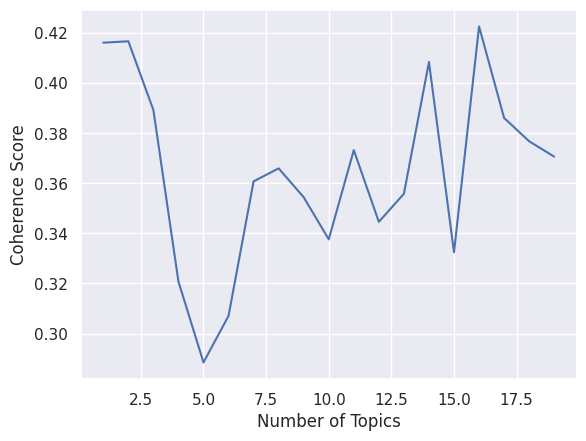

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=id2word, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = data_words, corpus=corpus, dictionary=id2word, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
index=0
for i,j in enumerate(score):
    print(i,j)
    if j == max(score):
        index = i

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= topics[index],
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0 0.4161285330860614
1 0.416683451423427
2 0.3892386421221084
3 0.32075587362145114
4 0.2884626782630943
5 0.30707857858630666
6 0.3607659100245006
7 0.36594164119796657
8 0.3544187100517767
9 0.337614802321551
10 0.37323969003491475
11 0.3445948235212129
12 0.3558012998988565
13 0.40841618714723277
14 0.3324603014263382
15 0.42260366515143966
16 0.38607797416677103
17 0.37676670053060995
18 0.37063050634195355


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.169987 -0.215069       1        1  18.061268
10     0.076338 -0.179406       2        1  12.101636
3      0.005405 -0.245480       3        1  11.982082
15     0.110051  0.233653       4        1   7.887568
5     -0.217625 -0.013915       5        1   7.314781
2     -0.041280 -0.136476       6        1   6.973789
13    -0.217758  0.163788       7        1   6.436463
8     -0.089530  0.232872       8        1   6.411150
4      0.224969  0.001482       9        1   4.572500
0      0.158835 -0.119941      10        1   3.995284
7      0.170427  0.066297      11        1   3.560418
11     0.112060  0.087833      12        1   3.211830
1     -0.091792 -0.014211      13        1   3.211520
6      0.007160  0.052143      14        1   2.277029
14    -0.051995  0.082498      15        1   1.793685
9      0.014723  0.003930      16        1   0.208998, topic_info=          Term       Freq      Total Category  logprob  loglift
0         body  14.000000  14.000000  Default  30.0000  30.0000
26      system  28.000000  28.000000  Default  29.0000  29.0000
24    skeletal   9.000000   9.000000  Default  28.0000  28.0000
3        human  12.000000  12.000000  Default  27.0000  27.0000
20    muscular   6.000000   6.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
25      smooth   0.004884   4.074793  Topic16  -5.2627  -0.5560
26      system   0.004884  28.399578  Topic16  -5.2627  -2.4976
27        type   0.004884   4.079224  Topic16  -5.2627  -0.5571
28      create   0.004884   2.320810  Topic16  -5.2627   0.0069
29  facilitate   0.004884   1.934414  Topic16  -5.2627   0.1890

[727 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
158       1  0.671699    absorb
66        7  0.491905  activity
33        3  0.460828     adult
33        4  0.460828     adult
104       6  0.739010  affected
...     ...       ...       ...
146       4  0.460907      when
129       8  0.739207     where
57        3  0.462662     white
57        6  0.462662     white
181       4  0.734180     woman

[317 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 11, 4, 16, 6, 3, 14, 9, 5, 1, 8, 12, 2, 7, 15, 10])

In [ ]:
#OUR CONTRIBUTION
def getwords(lst):
  for topic in lst:
    words = []
    strwords = topic[1]
    wordlist = strwords.split(' + ')
    for word in wordlist:
      star = word.find('*')
      prob = float(word[:star])
      keyword = word[star+1:]
      if prob>0.025 and keyword not in words:
        words.append(keyword)
  return words

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#OUR CONTRIBUTION
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

def filter_sentences(resolved_txt):
  lem_text = lemmatization(nltk.sent_tokenize(resolved_txt))

  data_words = gen_words(lem_text)
  print (data_words[0][0:20])

  bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
  trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=100)

  data_bigrams = make_bigrams(data_words, bigram_phrases)
  data_bigrams_trigrams = make_trigrams(data_bigrams, bigram_phrases, trigram_phrases)

  print (data_bigrams_trigrams[0][0:20])

  id2word,corpus = tfidf_removal(data_bigrams_trigrams)

  topics = []
  score = []
  for i in range(1,20,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=id2word, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
    cm = CoherenceModel(model=lda_model, texts = data_words, corpus=corpus, dictionary=id2word, coherence='c_v')
    topics.append(i)
    score.append(cm.get_coherence())
  _=plt.plot(topics, score)
  _=plt.xlabel('Number of Topics')
  _=plt.ylabel('Coherence Score')
  plt.show()

  index=0
  for i,j in enumerate(score):
      print(i,j)
      if j == max(score):
          index = i

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics= topics[index],
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")

  pyLDAvis.enable_notebook()
  vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
  vis

  lst = lda_model.print_topics(-1)
  for topic in lst:
    words = []
    strwords = topic[1]
    wordlist = strwords.split(' + ')
    for word in wordlist:
        star = word.find('*')
        prob = float(word[:star])
        keyword = word[star+1:]
        print(prob, keyword)

  words = set(getwords(lda_model.print_topics(-1)))
  wordfin = []
  for word in words:
    wordfin.append(word.strip('\"'))

  sentences = []
  temp_list = resolved_txt.split('.')
  for sent in temp_list:
    for word in wordfin:
      if sent.find(word)!=-1:
        sentences.append(sent)

  filtered_sentences = set(sentences)
  return filtered_sentences

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['kid']
['kid']


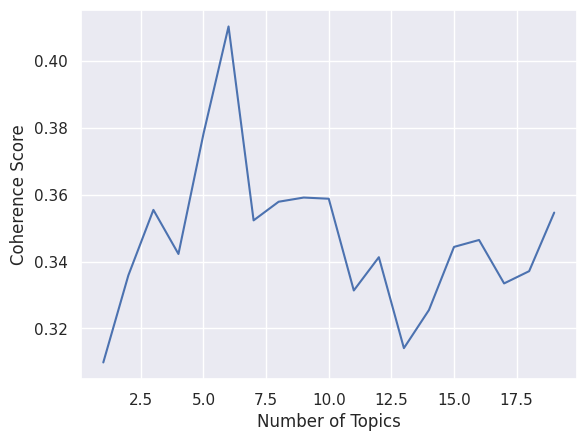

0 0.3098012385692383
1 0.33585548117954533
2 0.355451821767472
3 0.34225839429610233
4 0.3782397225640005
5 0.41033569477741844
6 0.3523134702894265
7 0.3578883999470507
8 0.35914067712263653
9 0.35878879930969076
10 0.33133667107579484
11 0.3412956969423262
12 0.3140825671598003
13 0.32549569466556155
14 0.34437197325702784
15 0.34644308126454354
16 0.33344752577999964
17 0.3371170023326387
18 0.3546388030880306


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


0.045 "trap"
0.031 "plant"
0.031 "leave"
0.031 "fly"
0.031 "mushroom"
0.031 "venous"
0.031 "photosynthesis"
0.031 "process"
0.017 "important"
0.017 "food"
0.076 "plant"
0.068 "photosynthesis"
0.038 "food"
0.038 "process"
0.032 "light"
0.032 "water"
0.026 "own"
0.026 "make"
0.02 "energy"
0.02 "human"
0.054 "use"
0.053 "plant"
0.046 "carbon"
0.046 "dioxide"
0.044 "glucose"
0.035 "water"
0.034 "extra"
0.027 "photosynthesis"
0.024 "form"
0.024 "store"
0.126 "pore"
0.064 "very"
0.064 "skin"
0.064 "body"
0.064 "similar"
0.028 "plant"
0.027 "energy"
0.027 "oxygen"
0.026 "responsible"
0.015 "amount"
0.052 "mean"
0.04 "plant"
0.027 "process"
0.027 "photosynthesis"
0.027 "leave"
0.027 "take"
0.027 "place"
0.027 "photo"
0.027 "put"
0.027 "synthesis"
0.071 "call"
0.057 "leave"
0.057 "cell"
0.047 "plant"
0.044 "green"
0.044 "color"
0.03 "system"
0.03 "suck"
0.03 "chloroplast"
0.03 "component"
['random', 'out', 'order', 'alphabet']
['random', 'out', 'order', 'alphabet']


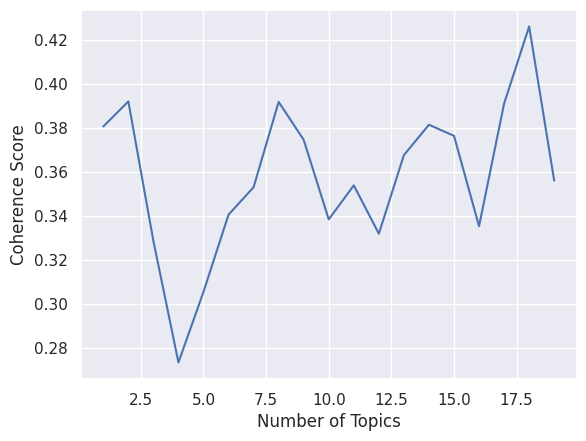

0 0.3806605052762548
1 0.39207384384942245
2 0.32858427017729
3 0.27332690982763946
4 0.3054620596958812
5 0.340561786831112
6 0.35304098802041156
7 0.39186942766210825
8 0.37456608335405356
9 0.33840865707053525
10 0.3538853383581237
11 0.33189464316178574
12 0.36766301353423514
13 0.38146888390906614
14 0.37640800429774646
15 0.33531362212691807
16 0.3910610490302736
17 0.4261774204208657
18 0.3560081640775228


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


0.033 "form"
0.033 "wound"
0.033 "infection"
0.033 "tooth"
0.033 "tissue"
0.033 "kind"
0.033 "make"
0.033 "heal"
0.033 "bone"
0.033 "get"
0.048 "fat"
0.041 "bacteria"
0.041 "fungi"
0.041 "plant"
0.041 "own"
0.041 "lipid"
0.041 "find"
0.041 "butter"
0.041 "soluble"
0.041 "dairy"
0.004 "pack"
0.004 "cell"
0.004 "overload"
0.004 "generally"
0.004 "stay"
0.004 "power"
0.004 "ration"
0.004 "basis"
0.004 "eat"
0.004 "should"
0.082 "vitamin"
0.05 "body"
0.033 "just"
0.033 "soluble"
0.033 "fat"
0.033 "need"
0.017 "type"
0.017 "part"
0.017 "store"
0.017 "generally"
0.004 "pack"
0.004 "cell"
0.004 "overload"
0.004 "generally"
0.004 "stay"
0.004 "power"
0.004 "ration"
0.004 "basis"
0.004 "eat"
0.004 "should"
0.123 "soluble"
0.082 "water"
0.042 "lipid"
0.042 "type"
0.042 "easily"
0.021 "store"
0.021 "rid"
0.021 "excess"
0.021 "difference"
0.021 "kidney"
0.004 "pack"
0.004 "cell"
0.004 "overload"
0.004 "generally"
0.004 "stay"
0.004 "power"
0.004 "ration"
0.004 "basis"
0.004 "eat"
0.004 "should"
0.

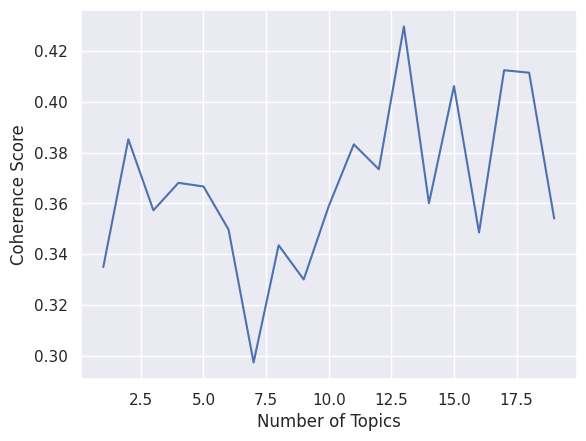

0 0.3349146743764418
1 0.38523111567171164
2 0.3572440579375907
3 0.36805922910977734
4 0.3666366931923534
5 0.3496636875646641
6 0.29732791520778207
7 0.34348278844601865
8 0.33000134680723536
9 0.35888420467236337
10 0.3832215080521946
11 0.373408658016016
12 0.42966090166057774
13 0.36005720003224845
14 0.40618506610117383
15 0.3485075592071868
16 0.4124188945917244
17 0.4114417728064845
18 0.3539843920511795


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


0.139 "wave"
0.07 "longitudinal"
0.047 "oscillation"
0.025 "example"
0.025 "seismic"
0.025 "last"
0.025 "parallel"
0.025 "thing"
0.025 "other"
0.025 "transverse"
0.072 "how"
0.054 "wave"
0.019 "speed"
0.019 "difference"
0.019 "different"
0.019 "go"
0.019 "video"
0.019 "look"
0.019 "transverse"
0.019 "today"
0.049 "today"
0.049 "hope"
0.049 "useful"
0.049 "soon"
0.049 "again"
0.049 "find"
0.049 "see"
0.049 "will"
0.049 "video"
0.004 "wave"
0.067 "wavelength"
0.051 "meter"
0.051 "time"
0.05 "instead"
0.034 "wave"
0.034 "frequency"
0.034 "hertz"
0.034 "centimeter"
0.018 "case"
0.018 "sound"
0.091 "wave"
0.061 "direction"
0.032 "down"
0.032 "why"
0.032 "when"
0.032 "transverse"
0.032 "perpendicular"
0.032 "leave"
0.032 "oscillation"
0.032 "travel"
0.134 "wave"
0.055 "transfer"
0.055 "point"
0.055 "how"
0.055 "far"
0.029 "place"
0.029 "matter"
0.029 "understand"
0.029 "energy"
0.029 "first"
0.08 "time"
0.061 "period"
0.041 "could"
0.041 "back"
0.041 "crest"
0.041 "down"
0.041 "oscillation"


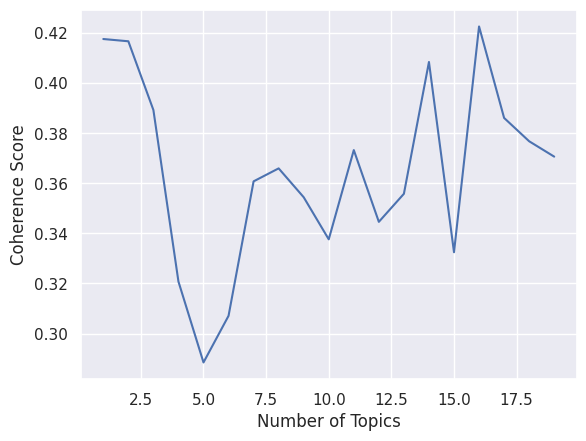

0 0.4175870257726856
1 0.416683451423427
2 0.3892386421221084
3 0.32075587362145114
4 0.2884626782630943
5 0.30707857858630666
6 0.3607659100245006
7 0.36594164119796657
8 0.3544187100517767
9 0.337614802321551
10 0.37323969003491475
11 0.3445948235212129
12 0.3558012998988565
13 0.40841618714723277
14 0.3324603014263382
15 0.42260366515143966
16 0.38607797416677103
17 0.37676670053060995
18 0.37063050634195355


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


0.069 "then"
0.035 "digestive"
0.035 "esophagus"
0.035 "urine"
0.035 "enter"
0.035 "vessel"
0.035 "intestine"
0.035 "mouth"
0.035 "move"
0.035 "stomach"
0.079 "system"
0.041 "regulate"
0.041 "series"
0.041 "information"
0.041 "nervous"
0.041 "endocrine"
0.041 "use"
0.041 "human"
0.041 "gland"
0.041 "process"
0.048 "body"
0.048 "system"
0.025 "send"
0.025 "then"
0.025 "transmit"
0.025 "area"
0.025 "information"
0.025 "regulate"
0.025 "immune"
0.025 "node"
0.076 "blood"
0.052 "system"
0.046 "body"
0.034 "include"
0.031 "heart"
0.031 "pipeline"
0.031 "hormone"
0.031 "then"
0.031 "human"
0.031 "cardiovascular"
0.062 "together"
0.032 "organ"
0.032 "cell"
0.032 "tissue"
0.032 "make"
0.032 "possible"
0.032 "body"
0.032 "human"
0.032 "life"
0.032 "complex"
0.046 "endocrine"
0.046 "such"
0.046 "thyroid"
0.046 "gland"
0.024 "cell"
0.024 "neural"
0.024 "other"
0.024 "thank"
0.024 "need"
0.024 "function"
0.097 "system"
0.09 "create"
0.046 "responsible"
0.046 "life"
0.046 "reproductive"
0.046 "faci

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
test_filtered_sentences = []
for resolved_txt in coref_resolved_text:
  test_filtered_sentences.append(filter_sentences(resolved_txt))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['atomic', 'model', 'quite', 'commendable', 'when', 'come', 'explain', 'structure', 'atom']
['atomic', 'model', 'quite', 'commendable', 'when', 'come', 'explain', 'structure', 'atom']


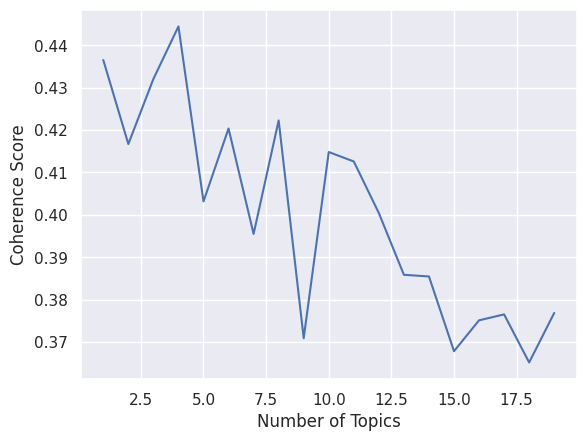

0 0.4365082673261013
1 0.4166934547926886
2 0.43204177703317326
3 0.444419280958819
4 0.4031699154051737
5 0.42035637803641973
6 0.39550094482608233
7 0.42225926440946404
8 0.3709227536088109
9 0.4148127248449184
10 0.4125855741006918
11 0.4004264249413106
12 0.38587414388907393
13 0.3854779146914553
14 0.3678559987546998
15 0.3751375884469633
16 0.37653375836498804
17 0.3652067677800472
18 0.3768681141353714


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


0.028 "sun"
0.028 "subatomic"
0.028 "particle"
0.028 "more"
0.016 "atomic"
0.016 "structure"
0.016 "explanation"
0.016 "describe"
0.016 "few"
0.016 "additional"
0.046 "electron"
0.046 "orbital"
0.046 "fix"
0.033 "nucleus"
0.032 "shell"
0.027 "how"
0.025 "define"
0.021 "letter"
0.021 "equal"
0.021 "on"
0.076 "energy"
0.037 "electron"
0.036 "level"
0.022 "name"
0.022 "now"
0.021 "radiate"
0.015 "will"
0.015 "get"
0.015 "orbit"
0.015 "find"
0.038 "fix"
0.038 "orbital"
0.033 "define"
0.025 "particle"
0.025 "more"
0.025 "subatomic"
0.025 "revolve"
0.025 "electron"
0.021 "atom"
0.017 "charge"


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


{" And how do we name fixed defined orbitals to indicate fixed defined orbitals's position? It's simple",
 ' And what if we want to number fixed defined orbitals? In that case, we use the letter N in lower case and write fixed defined orbitals as the letter N equals 1, the letter N equals 2, N equals 3 and so on, beginning from the 1 next to The nucleus',
 ' Beginning from the one near The nucleus, we name fixed defined orbitals as the K shell, L shell, M shell, N shell and so on',
 ' But have you noticed that the planets always revolve in fixed paths? We never find any planet jumping to a different path all of a sudden, right? the planets always encircle the sun in defined paths',
 " But how exactly are the electrons distributed in fixed orbitals around the nucleus? Is there a way to find out the maximum number of electrons that one orbital can contain? Or is it that the electrons are randomly scattered in fixed orbitals around the nucleus? Let's find out the answers to these question

In [ ]:
filter_sentences(resolved_txt)

In [ ]:
len(test_filtered_sentences)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4

In [ ]:
test_filtered_sentences

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{" Do kids know how plants make plants's own food? No? Well, this video elaborates the process of photosynthesis by which plants make plants's own food",
  " Glucose is used by the plants for the plants's growth",
  ' Leaves have important cells called mesofil cells',
  ' Leaves on the plant have pores, very similar to the pores on the skin of our bodies',
  ' Once the carbon dioxide and the water reach a green color component called chloroplasts in the presence of sunlight, the process of photosynthesis starts to take place',
  ' Photosynthesis is the conversion of light energy into chemical energy by plants',
  " Photosynthesis is the process used by plants to make plants's own food or in more complex terms",
  ' Plants have tubes called xylum, located in the stems through which the water from the ground is sucked into the leaves',
  " Similarly, to make plants's food, plants also need some essential factors, including light, water, nutrients, soil, etc",
  ' Some amount of the extr

In [ ]:
import pickle
with open('test_filtered_sentences.pkl','wb') as f:
  pickle.dump(test_filtered_sentences,f)

with open('coref_resolved_text.pkl','wb') as f1:
  pickle.dump(coref_resolved_text,f1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# BERT EXTRACTIVE SUMMARIZER

In [ ]:
pip install bert-extractive-summarizer

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from summarizer import Summarizer
model = Summarizer()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
for i, val in enumerate(test_txt):
  temp1 = val
  print(i)
  print(temp1)
  summary=open("/content/drive/MyDrive/DATASET/EVS_TXT/"+temp1,'r').read()
  print(summary)
  result = model(summary, min_length=20)
  print(result)
print("Number of Testing text: ", len(test_txt))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

In [ ]:
summary="Rutherford's atomic model was quite commendable when it came to explaining the structure of atoms. However, Rutherford's atomic model was not very appropriate theoretically. And why are we saying so? We know that any charged object which revolves in a circular motion gains acceleration gradually. Similarly, if the electron is moving fast in a circular path, then the electron will also gain acceleration. And on gaining acceleration, the electron's bound to liberate energy in some form. Now if the electron continuously keeps radiating energy, then ultimately all the energy of the electron will get over and all the energy of the electron will fall into the nucleus. This would result in high instability of the atom. But wait a second, all these things do not happen in an atom. And how do we know this? Because in nature, all the atoms are stable. That means the hypothesis put forth by Rutherford's was also incorrect. Not really, the hypothesis put forth by Rutherford just needed slight modifications. slight modifications were made by the next legendary scientist in our list called Niels Bohr. the next legendary scientist in our list called Niels Bohr made a few additional explanations to describe the atomic structure. The postulates put forward by the next legendary scientist in our list called Niels Bohr were as follows. Firstly, only certain special orbits called discrete orbits of electrons are allowed inside the atom. Secondly, while revolving in only certain special orbits called discrete orbits of electrons, the electrons do not radiate energy. Now these points definitely tell us why an atom is so stable. But what exactly are these paths or orbits in which the electrons revolve around the nucleus? Let's understand with an example. Do you know how our solar system is? Yes, our solar system appears somewhat like this. Now here, the sun is stationary at the centre while the planets revolve around the sun. But have you noticed that the planets always revolve in fixed paths? We never find any planet jumping to a different path all of a sudden, right? the planets always encircle the sun in defined paths. In a similar way, we have the atomic structure. The nucleus acts like the sun and the electrons are like planets which revolve in fixed defined orbitals. fixed defined orbitals are referred to as shells or energy levels. Now the name energy levels gets us to an important concept. the next legendary scientist in our list called Niels Bohr suggested that the electrons revolving in fixed defined orbitals do not radiate energy. Now this is justified when we use the name energy levels because the name energy levels indicates that each shell has got a defined energy level. That means when the electrons revolve in fixed defined orbitals, the electrons do not liberate any form of energy. And how do we name fixed defined orbitals to indicate fixed defined orbitals's position? It's simple. Beginning from the one near The nucleus, we name fixed defined orbitals as the K shell, L shell, M shell, N shell and so on. Yes, K L M N and so on. And what if we want to number fixed defined orbitals? In that case, we use the letter N in lower case and write fixed defined orbitals as the letter N equals 1, the letter N equals 2, N equals 3 and so on, beginning from the 1 next to The nucleus. So we can name fixed defined orbitals alphabetically or we can even number fixed defined orbitals. With all these theories and points known, do we now know the structure of a typical atom completely? The nucleus contains positive protons and the electrons revolving around in fixed orbitals. Is that how an atom is structured? Not really. We still have one more subatomic particle left. And what and where could one more subatomic particle be? Let's find that out. It was around the year 1932 when a famous English physicist Sir James Chadwick found one more subatomic particle. a famous English physicist Sir James Chadwick found that one more subatomic particle had a mass almost equivalent to that of the proton. And what about one more subatomic particle's charge? Astonishingly, one more subatomic particle had no charge. Yes, one more subatomic particle was neutral. one more subatomic particle was later named as neutron, denoted by the letter N. Does now we have the complete design of an atom? In the center lies the nucleus having positively charged protons and neutral neutrons, while the negatively charged electrons revolve in fixed orbitals around The nucleus. But how exactly are the electrons distributed in fixed orbitals around the nucleus? Is there a way to find out the maximum number of electrons that one orbital can contain? Or is it that the electrons are randomly scattered in fixed orbitals around the nucleus? Let's find out the answers to these questions in our upcoming video."
print(summary)
result = model(summary, min_length=20)
print(result)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rutherford's atomic model was quite commendable when it came to explaining the structure of atoms. However, Rutherford's atomic model was not very appropriate theoretically. And why are we saying so? We know that any charged object which revolves in a circular motion gains acceleration gradually. Similarly, if the electron is moving fast in a circular path, then the electron will also gain acceleration. And on gaining acceleration, the electron's bound to liberate energy in some form. Now if the electron continuously keeps radiating energy, then ultimately all the energy of the electron will get over and all the energy of the electron will fall into the nucleus. This would result in high instability of the atom. But wait a second, all these things do not happen in an atom. And how do we know this? Because in nature, all the atoms are stable. That means the hypothesis put forth by Rutherford's was also incorrect. Not really, the hypothesis put forth by Rutherford just needed slight modi

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Rutherford's atomic model was quite commendable when it came to explaining the structure of atoms. We know that any charged object which revolves in a circular motion gains acceleration gradually. Now if the electron continuously keeps radiating energy, then ultimately all the energy of the electron will get over and all the energy of the electron will fall into the nucleus. slight modifications were made by the next legendary scientist in our list called Niels Bohr. Now these points definitely tell us why an atom is so stable. Let's understand with an example. Now here, the sun is stationary at the centre while the planets revolve around the sun. Yes, K L M N and so on. With all these theories and points known, do we now know the structure of a typical atom completely? Is that how an atom is structured? Astonishingly, one more subatomic particle had no charge. In the center lies the nucleus having positively charged protons and neutral neutrons, while the negatively charged electrons 

In [ ]:
extracted_transcripts = ["Hello, kids. Do you know how plants make their own food? No? Well, this video elaborates the process of photosynthesis by which plants make their own food. Photosynthesis is the process used by plants to make their own food or in more complex terms. It is the conversion of light energy into chemical energy by plants. This chemical energy is used by the plants for growth and nourishment. Photo means light and synthesis means putting together in Greek. When humans cook food, some essential things are required, including fire, water, vegetables, etc. Similarly, to make their food, plants also need some essential factors, including light, water, nutrients, soil, etc. Plants get light from the sun, water from the ground, and carbon dioxide from the air. All of these factors, including air, water, carbon dioxide, and sunlight, together help plants churn out their own food. Plants have tubes called xylum, located in the stems through which the water from the ground is sucked into the leaves. This system works similar to humans sucking liquids through a straw. The xylum is spread throughout the different parts of the plant, including the stem, branches, and all the way up to the leaves. The xylum transports vital nutrients to the entire plant. Xylums in the plant are like blood vessels in the human body that act as an important means of transportation of water and nutrients. Leaves on the plant have pores, very similar to the pores on the skin of our bodies. These pores are called stomata. These stomata are responsible for the exchange of gases. The carbon dioxide present in the air, which is responsible for photosynthesis, enters the plant through these stomata. Oxygen also comes out through these stomata. Leaves have important cells called mesofil cells. These cells contain a green color component called chloroplasts. This chloroplasts is responsible for the green color of plants and leaves. Once the carbon dioxide and the water reach the chloroplasts in the presence of sunlight, the process of photosynthesis starts to take place. The following reaction takes place in the leaves of the plant during photosynthesis. Carbon dioxide plus water in the presence of light energy results in oxygen plus glucose or carbohydrates. The products formed are glucose and oxygen. Carbohydrates, which are a form of glucose, are synthesized from carbon dioxide and water. Glucose is used by the plants for their growth. Some of the glucose is used immediately and the extra glucose which is not used is stored in the form of starch in the leaves. Some amount of this extra glucose is also stored in the roots of the plants. This extra glucose is used to perform photosynthesis when there is no sunlight. Oxygen is given out into the air through the stomata in the process of photosynthesis. The oxygen that is released is used by human beings to breathe during their respiration process ever wondered why this process is called photosynthesis? Well the word photosynthesis is a combination of two Greek words photo and synthesis. Photo means light in Greek and synthesis means putting together or combining. Hence photosynthesis literally means combining water or carbon dioxide in the presence of light. So the essential factors for photosynthesis to take place include sunlight, water and carbon dioxide. Underwater photosynthesis takes place at a slower pace than the normal photosynthesis. This is because energy from the sun is absorbed by the water layers and only some amount of energy actually reaches the plant. There are some plants which don't need the process of photosynthesis to grow. Such plants include mushroom, venous fly traps etc. Mushrooms get their food from the ground and from their surrounding areas. Venus fly traps trap and catch small insects which come near the leaves and eat them. Don't forget to subscribe to our channel for more cool science videos.",
                       "A, C, E, D, B, K. No, this isn't some random out-of-order alphabet. These are vitamins. And just like letters build words, they're the building blocks that keep the body running. Vitamins are organic compounds we need to ingest in small amounts to keep functioning. They're the body's builders, defenders, and maintenance workers, helping it to build muscle and bone, make use of nutrients, capture and use energy, and heal wounds. If you need convincing about vitamin value, just consider the plight of olden-day sailors who had no access to vitamin-rich fresh produce. They got scurvy, but vitamin C, abundant in fruits and vegetables, was the simple antidote to this disease. While bacteria, fungi, and plants produce their own vitamins, our bodies can't, so we have to get them from other sources. So how does the body get vitamins from out there into here? That's dependent on the form these compounds take. Vitamins come in two types, lipid-soluble and water-soluble, and the difference between them determines how the body transports and stores vitamins and gets rid of the excess. The water-solubles are vitamin C and B-complex vitamins that are made up of eight different types that each do something unique. These are dissolved in the watery parts of fruits, vegetables, and grains, meaning their passage through the body is relatively straightforward. Once inside the system, these foods are digested, and the vitamins within them are taken up directly by the bloodstream. Because blood plasma is water-based, water-soluble vitamins C and B have their transport cut out for them, and can move around freely within the body. For lipid-soluble vitamins, dissolved in fat and found in foods like dairy, butter, and oils, this trip into the blood is a little more adventurous. These vitamins make it through the stomach and the intestine, where an acidic substance called bile flows in from the liver, breaking up the fat and preparing it for absorption through the intestinal wall. Because fat-soluble vitamins can't make use of the blood's watery nature, they need something else to move them around. And that comes from proteins that attach to the vitamins and act like couriers, transporting fat-solubles into the blood and around the body. So this difference between water or fat-soluble vitamins determines how they get into the blood, but also how they're stored or rejected from the body. The system's ability to circulate water-soluble vitamins in the bloodstream so easily means that most of them can be passed out equally easily via the kidneys. Because of that, most water-soluble vitamins need to be replenished on a daily basis through the food we eat. But fat-soluble vitamins have staying power because they can be packed into the liver and in fat cells. The body treats these parts like a pantry, storing the vitamins there and rationing them out when needed, meaning we shouldn't overload on this type of vitamin because the body is generally well stocked. Once we've figured the logistics of transport and storage, the vitamins are left to do the work they came here to do in the first place. Some, like many of the bee complex vitamins, make up co-enzymes, whose job it is to help enzymes release the energy from food. Other bee vitamins then help the body to use that energy. From vitamin C, you get the ability to fight infection and make collagen, a kind of tissue that forms bones and teeth and heals wounds. Vitamin A helps make white blood cells, key in the body's defense, helps shape bones, and improves vision by keeping the cells of the eye in check. Vitamin D gathers calcium and phosphorus so we can make bones, and vitamin E works as an antioxidant, getting rid of elements in the body that can damage cells. Finally, from vitamin K, we score the ability to clot blood, since it helps make the proteins that do this job. Without this vitamin variety, humans face deficiencies that cause a range of problems like fatigue, nerve damage, heart disorders, or diseases like rickets and scurvy. On the other hand, too much of any vitamin can cause toxicity in the body, so there goes the myth that loading yourself with supplements is a great idea. In reality, it's all about getting the balance right and hitting that vitamin jackpot.",
                       "In today's video, we're going to look at the basics of waves, including how to label the different parts, how to calculate the wave speed, and the differences between transverse and longitudinal waves. The first thing to understand about waves is that they transfer energy from one place to another, but they don't transfer any matter. So when light waves pass from a phone screen to your eye, or sound waves pass from the speakers to your ear, only energy is being transferred. Sometimes though we can interpret that energy as meaningful information, which is why our brain is able to build up images and tunes from the light and sound that it receives. To travel from one place to another, the waves vibrate or oscillate, as we can see in this displacement distance graph. The distance is how far the wave has travelled from the starting point. While the displacement is how far from the equilibrium point, the wave has oscillated. So how far it's gone up or down. The maximum displacement is known as the amplitude, while the distance of one entire oscillation is called the wavelength. So that could be from equilibrium, up, down and back up, or it could be from the very top of a wave, which we call the crest, down and back up to the next crest. It just has to be one entire oscillation. And the opposite of the crest is called the trough. Now sometimes you might see a displacement time graph instead, which looks pretty much the same, but because we have time on the x-axis, instead of distance, the length of one complete oscillation would be the time period instead of the wavelength. And the time period is just the time it takes for one complete oscillation. The benefit of knowing the time period is that we can then use this equation here to work out frequency, which is measured in hertz and is a number of complete oscillations per second. To see how it works, imagine that each oscillation takes 0.5 seconds. Or in other words, the time period is 0.5 seconds. This means that there must be a total of two oscillations per second, so the frequency is two, which is what we'd get if we did one divided by the time period of 0.5. We can also use the equation the other way around, so time period equals 1 over frequency. So if we were told that the frequency of a wave was 4 hertz, which means 4 oscillations per second, then to find the time period, which is to 1 divided by 4, which tells us that each oscillation must be 0.25 seconds. The next equation to know is that we can find the speed of the wave, so the wave speed, by multiplying the wavelength by the frequency. So basically, we multiply how long each wavelength is, by how many there are per second. And that will give us the total distance they travel per second. To see how this works, let's imagine we had a sound wave that had a frequency of 400 hertz, and a wavelength of 70 centimeters. What is its wave speed? Well in this case, all we'd have to do is convert the 70 centimeters to 0.7 meters, because we always want our wavelength in meters, and then multiply it by their frequency of 400 hertz, which gives us 280 meters per second as our wave speed. The last thing we need to look at are the differences between transverse and longitudinal waves. When transverse waves, the oscillations are perpendicular to the direction of energy transfer, or the direction in which the wave is moving, which is why on our drawing, the vibrations are going up and down, whilst the overall wave is travelling from left to right. Most waves we can think of are transverse, including all electromagnetic waves like light and radio waves, ripples and waves in water, and the waves of strings like on a guitar. Longitudinal waves on the other hand have oscillations that are parallel to the direction of energy transfer. This one's a bit trickier to get your head around, but basically it leads to some regions that are more spread out, and other regions that are more compressed, because the waves vibrating back and forth. In motion, it would look as if this area of compression is moving from the left to the right within the wave. Examples of longitudinal waves include sound waves, and some types of shock waves, like seismic p-waves. Anyway, that's everything for this video, so hope you found it useful, and we'll see you again soon.",
                       "The human body is a complex network of cells, tissues, and organs that together make life possible. Ten major systems are responsible for the body's functions, skeletal, muscular, cardiovascular, nervous, endocrine, lymphatic, respiratory, digestive, urinary, reproductive. The skeletal, muscular, cardiovascular, and nervous systems in particular create an infrastructure that facilitates the other systems. The adult skeletal system is a framework of over 200 bones. They hold the body together, give it shape, and protect its organs and tissues. The skeleton also provides anchor points for the muscular system, which includes three types of muscles, skeletal, smooth, and cardiac. They are found throughout the body and facilitate movement. Nestled within these muscles is the cardiovascular system, a pipeline that includes the heart, blood vessels, and the blood itself. Also called the circulatory system, the cardiovascular system delivers oxygen, white blood cells, hormones, and nutrients throughout the body. Lastly, the nervous system is a communication network of nerve cells that the body uses to transmit information and coordinate bodily functions. It's comprised of the brain, the hub of sensory and intellectual activity, the spinal cord, and the many cranial and spinal nerves that emanate from them. This infrastructure created by neurons, blood, muscles, and bones allows three other systems to regulate the body's environment, the endocrine, lymphatic, and urinary systems. The endocrine system is a series of glands that use information carried by the nervous system to help regulate the body's processes. Thanks to this neural connection, endocrine glands, such as the thyroid, are aware of the amount of hormones and other chemicals they need to produce. These chemicals are then distributed throughout the body by way of the cardiovascular system. The cardiovascular and nervous systems are also utilized by the lymphatic system, a collection of lymph nodes and vessels that help regulate the body's defenses. Also called the immune system, the lymphatic system uses neural pathways to transmit information about affected areas of the body and then sends out healing agents like white blood cells via the bloodstream. Another key regulatory system is the urinary system, which includes the kidneys, ureters, bladder, and urethra. The urinary or renal system maintains the body's electrolyte levels and filters waste from the blood. This waste is sent through the blood vessels into the kidneys and then expelled as urine. All of these systems require energy to function and that's where the respiratory and digestive systems come in. The respiratory system is a group of passageways and organs that extracts life-giving oxygen from the air we breathe. Air enters the body through nasal cavities, travels down the throat, and is then transported to the lungs. The lungs extract oxygen for the body to use and then expel a carbon dioxide by product when we exhale. Energy can also come in the form of food. The digestive system is an approximately 30-foot series of organs that convert food into fuel. Food enters the system through the mouth, then moves into the esophagus, the stomach, and the intestines. Nutrients are absorbed into the body while solid waste is expelled through the anal canal, the end of the digestive tract. No matter the role, size, or shape of any of the body's systems, each began with the reproductive system. This system is responsible for creating life. The primary organs involved differ between the sexes with ovaries, fallopian tubes, the uterus, and vagina found in women and testes and a sperm channel found in men. Together, fertilization may occur. Organ systems form and then a child is born. Humans are complicated organisms, but when our 10 major organ systems are healthy, they ensure our well-being."
                      ]

In [ ]:
coref_resolved_text = [" Hello, kids. Do kids know how plants make plants's own food? No? Well, this video elaborates the process of photosynthesis by which plants make plants's own food. Photosynthesis is the process used by plants to make plants's own food or in more complex terms. Photosynthesis is the conversion of light energy into chemical energy by plants. chemical energy is used by plants for growth and nourishment. Photo means light and synthesis means putting together in Greek. When humans cook food, some essential things are required, including fire, water, vegetables, etc. Similarly, to make plants's food, plants also need some essential factors, including light, water, nutrients, soil, etc. Plants get light from the sun, water from the ground, and carbon dioxide from the air. some essential factors, including light, water, nutrients, soil, etc, together help plants churn out plants's own food. Plants have tubes called xylum, located in the stems through which the water from the ground is sucked into the leaves. This system works similar to humans sucking liquids through a straw. This system is spread throughout the different parts of the plant, including the stem, branches, and all the way up to the leaves. This system transports vital nutrients to the plant. Xylums in the plant are like blood vessels in the human body that act as an important means of transportation of water and nutrients. Leaves on the plant have pores, very similar to the pores on the skin of our bodies. pores, very similar to the pores on the skin of our bodies are called stomata. pores, very similar to the pores on the skin of our bodies are responsible for the exchange of gases. The carbon dioxide present in the air, which is responsible for Photosynthesis, enters the plant through pores, very similar to the pores on the skin of our bodies. Oxygen also comes out through pores, very similar to the pores on the skin of our bodies. Leaves have important cells called mesofil cells. important cells called mesofil cells contain a green color component called chloroplasts. a green color component called chloroplasts is responsible for the green color of plants and leaves. Once the carbon dioxide and the water reach a green color component called chloroplasts in the presence of sunlight, the process of photosynthesis starts to take place. The following reaction takes place in the leaves of the plant during the process of photosynthesis. Carbon dioxide plus water in the presence of light energy results in oxygen plus glucose or carbohydrates. The products formed are glucose and oxygen. Carbohydrates, which are a form of glucose, are synthesized from carbon dioxide and water. Glucose is used by the plants for the plants's growth. Some of Glucose is used immediately and the extra glucose which is not used is stored in the form of starch in the leaves. Some amount of the extra glucose which is not used is also stored in the roots of the plants. Some amount of this extra glucose is used to perform the process of photosynthesis when there is no sunlight. Oxygen is given out into the air through the stomata in the process of photosynthesis. The oxygen that is released is used by human beings to breathe during human beings's respiration process ever wondered why the process of photosynthesis is called photosynthesis? Well the word photosynthesis is a combination of two Greek words photo and synthesis. Photo means light in Greek and synthesis means putting together or combining. Hence photosynthesis literally means combining water or carbon dioxide in the presence of light. So the essential factors for photosynthesis to take place include sunlight, water and carbon dioxide. Underwater photosynthesis takes place at a slower pace than the normal photosynthesis. This is because energy from the sun is absorbed by the water layers and only some amount of energy actually reaches the plant. There are some plants which don't need the process of photosynthesis to grow. some plants which don't need the process of photosynthesis to grow include mushroom, venous fly traps etc. Mushrooms get Mushrooms's food from the ground and from Mushrooms's surrounding areas. venous fly traps trap and catch small insects which come near the leaves and eat the leaves. Don't forget to subscribe to our channel for more cool science videos.",
 " A, C, E, D, B, K. No, this isn't some random out-of-order alphabet. These are vitamins. And just like letters build words, letters're the building blocks that keep the body running. Vitamins are organic compounds we need to ingest in small amounts to keep functioning. Vitamins're the body's builders, defenders, and maintenance workers, helping the body's to build muscle and bone, make use of nutrients, capture and use energy, and heal wounds. If you need convincing about vitamin value, just consider the plight of olden-day sailors who had no access to vitamin-rich fresh produce. olden-day sailors who had no access to vitamin-rich fresh produce got this disease, but vitamin C, abundant in fruits and vegetables, was the simple antidote to this disease. While bacteria, fungi, and plants produce bacteria, fungi, and plants's own vitamins, our bodies can't, so we have to get their own vitamins from other sources. So how does the body get vitamins from out there into here? That's dependent on the form vitamins take. Vitamins come in two types, lipid-soluble and water-soluble, and the difference between two types, lipid-soluble and water-soluble determines how the body transports and stores vitamins and gets rid of the excess. The water-solubles are vitamin C and B-complex vitamins that are made up of eight different types that each do something unique. The water-solubles are dissolved in the watery parts of fruits, vegetables, and grains, meaning The water-solubles's passage through the body is relatively straightforward. Once inside the system, fruits, vegetables, and grains are digested, and the vitamins within fruits, vegetables, and grains are taken up directly by the bloodstream. Because blood plasma is water-based, water-soluble vitamins C and B have water-soluble vitamins C and B's transport cut out for water-soluble vitamins C and B, and can move around freely within the body. For lipid-soluble vitamins, dissolved in fat and found in foods like dairy, butter, and oils, this trip into the blood is a little more adventurous. lipid-soluble vitamins, dissolved in fat and found in foods like dairy, butter, and oils make it through the stomach and the intestine, where an acidic substance called bile flows in from the liver, breaking up the fat and preparing the fat for absorption through the intestinal wall. Because fat-soluble vitamins can't make use of the blood's watery nature, fat-soluble vitamins need something else to move fat-soluble vitamins around. And that comes from proteins that attach to fat-soluble vitamins and act like couriers, transporting fat-solubles into the blood's and around the body. So this difference between water or fat-soluble vitamins determines how fat-soluble vitamins get into the blood, but also how fat-soluble vitamins're stored or rejected from the body. The system's ability to circulate water-soluble vitamins in the blood so easily means that most of water-soluble vitamins can be passed out equally easily via the kidneys. Because of that, most water-soluble vitamins need to be replenished on a daily basis through the food we eat. But fat-soluble vitamins have staying power because fat-soluble vitamins can be packed into the liver and in fat cells. The body treats these parts like a pantry, storing fat-soluble vitamins there and rationing fat-soluble vitamins out when needed, meaning we shouldn't overload on this type of vitamin because The body is generally well stocked. Once we've figured the logistics of transport and storage, fat-soluble vitamins are left to do the work fat-soluble vitamins came here to do in the first place. Some, like many of the bee complex vitamins, make up co-enzymes, whose job it is to help enzymes release the energy from food. Other bee vitamins then help the body to use the energy. From vitamin C, you get the ability to fight infection and make collagen, a kind of tissue that forms bones and teeth and heals wounds. Vitamin A helps make white blood cells, key in the body's defense, helps shape bones, and improves vision by keeping the cells of the eye in check. Vitamin D gathers calcium and phosphorus so we can make bones, and vitamin E works as an antioxidant, getting rid of elements in the body that can damage cells. Finally, from vitamin K, we score the ability to this job blood, since vitamin K helps make the proteins that do this job. Without this vitamin variety, humans face deficiencies that cause a range of problems like fatigue, nerve damage, heart disorders, or diseases like rickets and scurvy. On the other hand, too much of any vitamin can cause toxicity in the body, so there goes the myth that loading yourself with supplements is a great idea. In reality, it's all about getting the balance right and hitting that vitamin jackpot.",
 " In today's video, we're going to look at the basics of waves, including how to label the different parts, how to calculate the wave speed, and the differences between transverse and longitudinal waves. The first thing to understand about waves is that waves transfer energy from one place to another, but waves don't transfer any matter. So when light waves pass from a phone screen to your eye, or sound waves pass from the speakers to your ear, only energy is being transferred. Sometimes though we can interpret only energy as meaningful information, which is why our brain is able to build up images and tunes from the light and sound that our brain receives. To travel from one place to another, the waves vibrate or oscillate, as we can see in this displacement distance graph. The distance is how far the wave has travelled from the starting point. While the displacement is how far from the equilibrium point, the wave has oscillated. So how far the wave's gone up or down. The maximum displacement is known as the amplitude, while the distance of one entire oscillation is called the wavelength. So that could be from equilibrium, up, down and back up, or it could be from the very top of a wave, which we call the crest, down and back up to the next crest. It just has to be one entire oscillation. And the opposite of the crest is called the trough. Now sometimes you might see a displacement time graph instead, which looks pretty much the same, but because we have time on the x-axis, instead of distance, the length of one complete oscillation would be the time period instead of the wavelength. And the time period is just the time it takes for one complete oscillation. The benefit of knowing the time period is that we can then use this equation here to work out frequency, which is measured in hertz and is a number of complete oscillations per second. To see how it works, imagine that each oscillation takes 0.5 seconds. Or in other words, the time period is 0.5 seconds. This means that there must be a total of two oscillations per second, so the frequency is two, which is what we'd get if we did one divided by the time period of 0.5. We can also use this equation here the other way around, so time period equals 1 over frequency. So if we were told that the frequency of a wave was 4 hertz, which means 4 oscillations per second, then to find the time period, which is to 1 divided by 4, which tells us that each oscillation must be 0.25 seconds. The next equation to know is that we can find the speed of the wave, so the wave speed, by multiplying the wavelength by the frequency. So basically, we multiply how long each wavelength is, by how many there are per second. And that will give us the total distance they travel per second. To see how this works, let's imagine we had a sound wave that had a frequency of 400 hertz, and a wavelength of 70 centimeters. What is a sound wave that had a frequency of 400 hertz, and a wavelength of 70 centimeters's wave speed? Well in this case, all we'd have to do is convert 70 centimeters to 0.7 meters, because we always want our wavelength in meters, and then multiply our wavelength by a sound wave that had a frequency of 400 hertz, and a wavelength of 70 centimeters's frequency of 400 hertz, which gives us 280 meters per second as our wave speed. The last thing we need to look at are the differences between transverse and longitudinal waves. When transverse waves, the oscillations are perpendicular to the direction of energy transfer, or the direction in which the wave is moving, which is why on our drawing, the vibrations are going up and down, whilst the overall wave is travelling from left to right. Most waves we can think of are transverse, including all electromagnetic waves like light and radio waves, ripples and waves in water, and the waves of strings like on a guitar. Longitudinal waves on the other hand have oscillations that are parallel to the direction of energy transfer. This one's a bit trickier to get your head around, but basically This one leads to some regions that are more spread out, and other regions that are more compressed, because the waves vibrating back and forth. In motion, it would look as if other regions that are more compressed is moving from the left to the right within the wave. Examples of longitudinal waves include sound waves, and some types of shock waves, like seismic p-waves. Anyway, that's everything for today's video, so hope you found it useful, and we'll see you again soon.",
 " The human body is a complex network of cells, tissues, and organs that together make life possible. Ten major systems are responsible for The human body's functions, skeletal, the muscular system, which includes three types of muscles, skeletal, smooth, and cardiac, cardiovascular, nervous, endocrine, lymphatic, respiratory, digestive, urinary, reproductive. The skeletal, muscular, cardiovascular, and nervous systems in particular create an infrastructure that facilitates the other systems. The adult skeletal system is a framework of over 200 bones. over 200 bones hold The human body together, give The human body shape, and protect The human body's organs and tissues. The adult skeletal system also provides anchor points for the muscular system, which includes three types of muscles, skeletal, smooth, and cardiac. the muscular system, which includes three types of muscles, skeletal, smooth, and cardiac are found throughout The human body and facilitate movement. Nestled within the muscular system, which includes three types of muscles, skeletal, smooth, and cardiac is the cardiovascular system, a pipeline that includes the heart, blood vessels, and the blood the blood itself. Also called the circulatory system, the cardiovascular system, a pipeline that includes the heart, blood vessels, and the blood itself delivers oxygen, white blood cells, hormones, and nutrients throughout The human body. Lastly, the nervous system is a communication network of nerve cells that The human body uses to transmit information and coordinate bodily functions. the nervous system's comprised of the brain, the hub of sensory and intellectual activity, the spinal cord, and the many cranial and spinal nerves that emanate from the brain, the hub of sensory and intellectual activity, the spinal cord,. This infrastructure created by neurons, blood, muscles, and bones allows three other systems to regulate The human body's environment, three other systems. The endocrine system is a series of glands that use information carried by the nervous system to help regulate The human body's processes. Thanks to this neural connection, endocrine glands, such as the thyroid, are aware of the amount of hormones and other chemicals endocrine glands, such as the thyroid need to produce. hormones and other chemicals they need to produce are then distributed throughout The human body by way of the cardiovascular system, a pipeline that includes the heart, blood vessels, and the blood itself. The skeletal, muscular, cardiovascular, and nervous systems in particular are also utilized by the lymphatic system, a collection of lymph nodes and vessels that help regulate The human body's defenses. Also called the immune system, the lymphatic system, a collection of lymph nodes and vessels that help regulate the body's defenses uses neural pathways to transmit information about affected areas of The human body and then sends out healing agents like white blood cells via the bloodstream. Another key regulatory system is the urinary system, which includes the kidneys, ureters, bladder, and urethra. the urinary system, which includes the kidneys, ureters, bladder, and urethra maintains The human body's electrolyte levels and filters waste from the blood. waste is sent through the blood vessels into the kidneys and then expelled as urine. The skeletal, muscular, cardiovascular, and nervous systems in particular require energy to function and that's where The skeletal, muscular, cardiovascular, and nervous systems in particular come in. The respiratory system is a group of passageways and organs that extracts life-giving oxygen from the air we breathe. Air enters the body through nasal cavities, travels down the throat, and is then transported to the lungs. the lungs extract oxygen for The human body to use and then expel a carbon dioxide by product when we exhale. Energy can also come in the form of food. The digestive system is an approximately 30-foot series of organs that convert food into fuel. Food enters The digestive system through the mouth, then moves into the esophagus, the stomach, and the intestines. Nutrients are absorbed into the body while solid waste is expelled through the anal canal, the end of The digestive system. No matter the role, size, or shape of any of the body's systems, each began with the reproductive system. the reproductive system is responsible for creating life. The primary organs involved differ between the sexes with ovaries, fallopian tubes, the uterus, and vagina found in women and testes and a sperm channel found in men. Together, fertilization may occur. Organ systems form and then a child is born. Humans are complicated organisms, but when Humans's 10 major organ systems are healthy, our 10 major organ systems ensure Humans's well-being. ."]

In [ ]:
!pip install bert-extractive-summarizer
from summarizer import Summarizer

def generate_summary(text):
  model = Summarizer()
  return model(text, min_length=20)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
summaries = []
for text in extracted_transcripts:
  summaries.append(generate_summary(text))

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

In [ ]:
summaries

['Do you know how plants make their own food? Well, this video elaborates the process of photosynthesis by which plants make their own food. Photosynthesis is the process used by plants to make their own food or in more complex terms. These pores are called stomata. The carbon dioxide present in the air, which is responsible for photosynthesis, enters the plant through these stomata. These cells contain a green color component called chloroplasts. This chloroplasts is responsible for the green color of plants and leaves. Oxygen is given out into the air through the stomata in the process of photosynthesis. Photo means light in Greek and synthesis means putting together or combining.',
 "A, C, E, D, B, K. No, this isn't some random out-of-order alphabet. That's dependent on the form these compounds take. Vitamins come in two types, lipid-soluble and water-soluble, and the difference between them determines how the body transports and stores vitamins and gets rid of the excess. Once insi

In [ ]:
coref_summaries = []
for text in coref_resolved_text:
  coref_summaries.append(generate_summary(text))

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

In [ ]:
coref_summaries

["Do kids know how plants make plants's own food? Photosynthesis is the process used by plants to make plants's own food or in more complex terms. chemical energy is used by plants for growth and nourishment. Photo means light and synthesis means putting together in Greek. pores, very similar to the pores on the skin of our bodies are responsible for the exchange of gases. Carbohydrates, which are a form of glucose, are synthesized from carbon dioxide and water. Glucose is used by the plants for the plants's growth. So the essential factors for photosynthesis to take place include sunlight, water and carbon dioxide. some plants which don't need the process of photosynthesis to grow include mushroom, venous fly traps etc.",
 "A, C, E, D, B, K. No, this isn't some random out-of-order alphabet. And just like letters build words, letters're the building blocks that keep the body running. olden-day sailors who had no access to vitamin-rich fresh produce got this disease, but vitamin C, abun